## The data

In [68]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/pandas/datasets/hotel_bookings.csv'
bookings = pd.read_csv(url)

The basic idea:

In [69]:
bookings[:5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


The other hotel type in the `hotel` column.

In [94]:
bookings[-5:]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Here's the basic descriptive data about the DataFrame, which is rather large:

In [76]:
bookings.shape

(119390, 32)

In [77]:
bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Let's list the possible values for the categorical columns,
which always have dtype `object` (which effectively means string,
but we'll skip columns with dates).

In [93]:
for col in bookings.dtypes[bookings.dtypes.isin([object])].index:
    if col.endswith("date"):
        continue
    print(col, bookings[col].unique(),end="\n\n")

hotel ['Resort Hotel' 'City Hotel']

arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal ['BB' 'FB' 'HB' 'SC' 'Undefined']

country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 

## Exercises

#### Problem

Generate a table which, for each hotel type (`City Hotel` and `Resort Hotel`),
breaks down the the counts of canceled and uncanceled bookings.
That breakdown can be found by using the `is_cancelled` column (values `0` or `1`).

Refinement one: Add an extra margins row to show the total number of `City Hotel`  and
`Resort Hotel` bookings.

Refinement two: Add an extra margins column to show the total number of uncanceled
and canceled bookings.


#### Solution

In [71]:
cts = pd.crosstab(bookings['is_canceled'],bookings['hotel'],margins=True)

In [72]:
cts

hotel,City Hotel,Resort Hotel,All
is_canceled,,,
0,46228,28938,75166
1,33102,11122,44224
All,79330,40060,119390


#### Problem

Building from the solution to the previous problem, 
generate a table which, for each hotel type (`City Hotel` and `Resort Hotel`),
gives the percentage of canceled and uncanceled bookings.

#### Solution

In [73]:
cts2 = pd.crosstab(bookings['hotel'],bookings['is_canceled'],normalize="index")

In [74]:
cts2

is_canceled,0,1
hotel,,
City Hotel,0.582730,0.417270
Resort Hotel,0.722366,0.277634


#### Problem

Draw a bar chart showing the number of arrivals month by month. The x-axis should show month names
(ideally rotated 60 degrees from the horizontal),  the y-axis should show the number of arrivals. 

Hint one:  Focus on the `"arrival_date_month"`
column.  Have a look at the Pandas Part One Notebook for bar chart examples, using
the `.plot()` method on a `Series`.  

You can do the following refinements all at once, or one by one.  Each refinement assumes the
previous refinements have already been implemented.

Refinement one:  Make sure the months are shown on the x-axis in temporal order ("January", "February",
"March", etc.).  Hint:  It's hard to get the various sort methods you might use
to do the right thing with the given data types. One approach is to focus on generating
a list of strings giving the months in the right order, then use that list to get your plot
to display the months in the right order.


Refinement two:  Separate the rows into Resort Hotel and City Hotel rows.  Do a separate
plot for each Hotel type, with a title indicating the hotel type.

Refinement three:  Show the the two plots of refinement two as two subplots of a single figure,
arranged side by side.

Final comment:  If you get to refinement three, you can do this essentially in one loop, using the 
`ax` parameter of the `.plot()` method to control which subplot each set of rows is drawn
on.

#### Solution (no refinements)

We are going to call the `.plot(kind="bar")` method of a `Series`.

In [66]:
type(bookings["arrival_date_month"].value_counts())

pandas.core.series.Series

<AxesSubplot:>

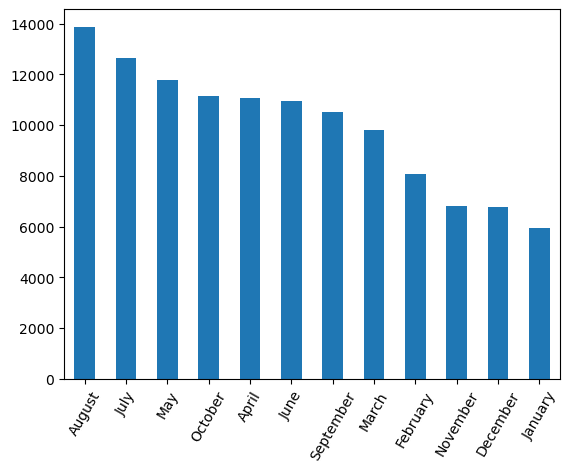

In [98]:
bookings_counts = bookings["arrival_date_month"].value_counts()
# Rotate the labels because they are sometimes fairly long strings
bookings_counts.plot(kind="bar",rot=60)

#### Solution (with temporal ordering of months)

To get the months in the x-axis of the plot below 
to come in temporal order instead of booking volume order,
we first generate a list of strings giving the month names in the right order.

In [53]:
import datetime
# A way of generating the month names in order: "%B" is a string format code meaning "month name"
# So each date object is used to extract only its month name
months = [datetime.date(month=i,year=2023,day=1).strftime("%B") for i in range(1,13)]
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

Now use fancy indexing to effectively reorder the index of the value_counts `Series`
to follow the order in `months`.

<AxesSubplot:>

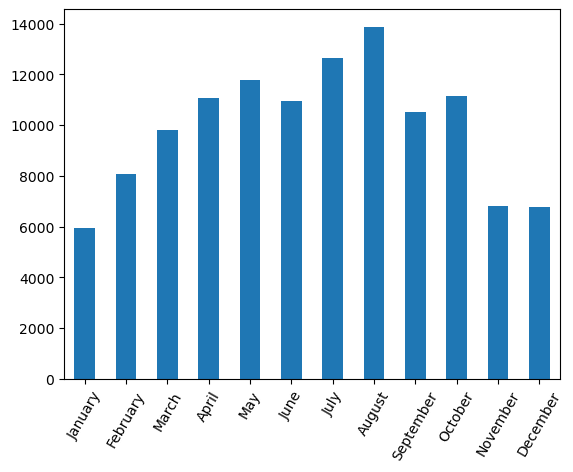

In [97]:
bookings_counts = bookings["arrival_date_month"].value_counts().loc[months]
bookings_counts.plot(kind="bar",rot=60)

#### Solution with all remaining refinements

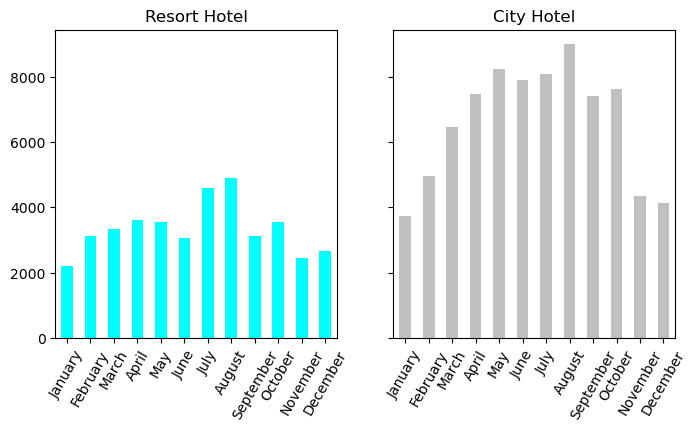

In [67]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(8,4),sharey=True)
colors = ["cyan","silver"]

for (i,hotel_type) in enumerate(["Resort Hotel", "City Hotel"]):
    # Create sub DF with just the rows belonging to this hotel type
    sub_bookings = bookings[bookings["hotel"]==hotel_type]
    bookings_counts = sub_bookings["arrival_date_month"].value_counts().loc[months]
    # Direct each plot to the right subplot of the figure by using the `ax` parameter
    # Add title.  Color the bar plots differently.
    bookings_counts.plot(kind="bar",ax=axes[i],rot=60,title=hotel_type,color=colors[i])